In [1]:
# Lab 3
import numpy as np
import matplotlib.pyplot as plt



In [4]:
# %%writefile stiff_ode.py

def stiff_lambda ( lambda_input = None ):
    if not hasattr ( stiff_lambda , "lambda_default" ) : 
        stiff_lambda.lambda_default = 4.0
    
    if ( lambda_input is not None ):
        stiff_lambda.lambda_default = lambda_input
    lambda_output = stiff_lambda.lambda_default
    return lambda_output











def stiff_ode ( x, y ):
    """
    dydx = stiff ode ( x, y ) right side of the stiff ODE
    input :
    x is independent variable
    y is dependent variable output :
    dydx is the value of f ode(x,y). """
    import numpy as np 
    
    LAMBDA= stiff_lambda()
    
    dydx = LAMBDA * ( - y + np.sin ( x ) ) 
    return dydx




  
def stiff_solution ( x ):
    """
    y = stiff solution ( x ) , solution of the stiff ODE.
    input :
    x is the independent variable output :
    y is the solution value """
    import numpy as np 
    
    LAMBDA= stiff_lambda()
    
    y = ( LAMBDA ** 2 / ( 1 +LAMBDA ** 2 ) ) * np.sin(x) + \
    ( LAMBDA / ( 1 + LAMBDA ** 2 ) ) * \
    ( np.exp ( -LAMBDA * x ) - np.cos ( x ) )
    return y



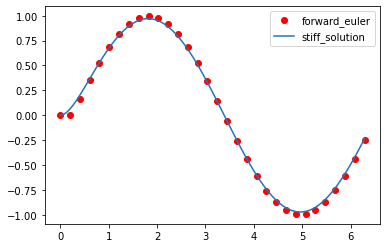

In [3]:
#%%writefile exercise1.py
from forward_euler import forward_euler
from stiff_ode import stiff_ode, stiff_solution
import matplotlib.pyplot as plt
import numpy as np

#x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 
yInitial = 0.0
xRange = [0, 2 * np.pi]
numSteps = 31

f_ode = stiff_ode

x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 

x2 = np.linspace(0, 2*np.pi, 101)
y_exact = stiff_solution(x2)


plt.plot(x,y, "ro",label="forward_euler")
plt.plot(x2,y_exact, label="stiff_solution")
plt.legend()
plt.savefig("exercise1.pdf")
plt.show()

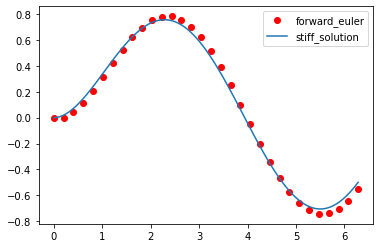

In [4]:
from stiff_ode import stiff_lambda
LAMBDA = 1.0
stiff_lambda(LAMBDA)

from forward_euler import forward_euler
from stiff_ode import stiff_ode, stiff_solution
import matplotlib.pyplot as plt
import numpy as np

#x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 
yInitial = 0.0
xRange = [0, 2 * np.pi]
numSteps = 31

f_ode = stiff_ode

x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 

x2 = np.linspace(0, 2*np.pi, 101)
y_exact = stiff_solution(x2)


plt.plot(x,y, "ro",label="forward_euler")
plt.plot(x2,y_exact, label="stiff_solution")
plt.legend()
plt.savefig("exercise1.pdf")
plt.show()

In [5]:
#%%writefile stiff_direction.py



def stiff_direction ( LAMBDA ) :
    
    import numpy as np 
    from stiff_ode import stiff_ode, stiff_solution, stiff_lambda 
    import matplotlib.pyplot as plt
    #
    #Define the value of LAMBDA.
    #
    stiff_lambda ( LAMBDA )
    #
    #Sample dy/dx over [0 ,2 pi ] x[=1,+1]
    #
    x = np.linspace ( 0.0, 2.0 * np.pi, 16 ) 
    y = np. linspace ( -1.5, +1.5, 9 )
    X, Y = np.meshgrid ( x, y ) 
    PX = np.ones ( X.shape )
    PY = stiff_ode ( X, Y ) 
    scale = 5.0
    plt.quiver ( X, Y, PX, PY, scale )

    #
    #Evaluate and plot the exact solution.
    #
    x2 = np.linspace ( 0.0, 2.0 * np.pi, 101 ) 
    y2 = stiff_solution ( x2 )
    plt.plot ( x2, y2, 'r' )

    plt.grid ( True )
    plt.axis ( "equal" )
    plt.title ( "Direction field for stiff ODE, LAMBDA = " + str ( LAMBDA ) ) 
    plt.savefig ( "stiff direction.jpg" )
    plt.show ( ) 
    plt.close ( )




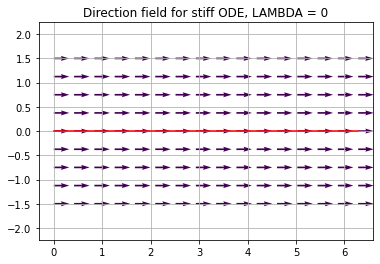

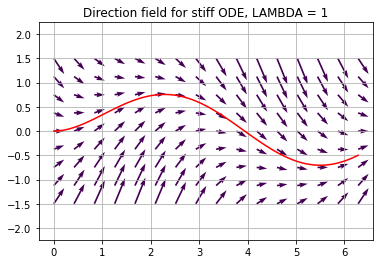

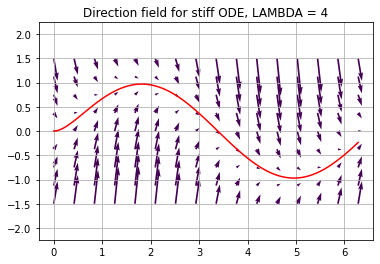

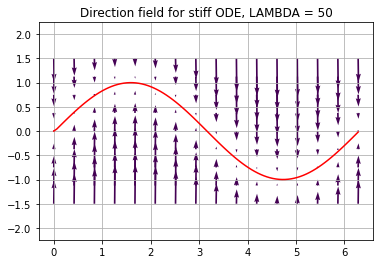

In [6]:
#%%writefile exercise2.py

# 3 lines of code
from stiff_direction import stiff_direction

for LAMBDA in [0, 1, 4, 50]:
    stiff_direction ( LAMBDA )





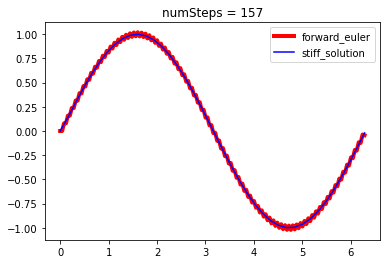

In [7]:


import matplotlib.pyplot as plt
import numpy as np

from forward_euler import forward_euler
from stiff_ode import stiff_ode, stiff_solution, stiff_lambda 



n = 40
x_sol = np.linspace(0, 2*np.pi, n)
y_sol = stiff_solution(x_sol)
#plt.plot(x_sol,y_sol,"b", label="stiff_solution")


LAMBDA = 10000

#x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 
yInitial = 0.0
xRange = [0, 2 * np.pi]
numSteps = 157

f_ode = stiff_ode

x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 


plt.plot(x,y, "r", linewidth = 4,label="forward_euler")
plt.plot(x_sol,y_sol,"b", label="stiff_solution")

plt.title("numSteps = %d" %numSteps)
plt.legend()
plt.savefig("Exercise3.pdf")
plt.show()




In [8]:
#%%writefile back_euler_lam.py


def back_euler_lam ( LAMBDA, xRange , yInitial , numSteps ):
    import numpy as np
    
    x = np.zeros ( numSteps + 1 )
    y = np.zeros ( ( numSteps + 1, np.size( yInitial ) ) ) 

    dx = ( xRange[1] - xRange[0] ) / numSteps

    for k in range( 0, numSteps+1 ):
        if ( k == 0 ) :
            x[0] = xRange[0] 
            y[0 ,:] = yInitial
        else :
            x[k] = x[k-1] + dx
            y[k,:] = (y[k-1,:] + dx * LAMBDA * np.sin(x[k])) / (1 + dx * LAMBDA)
    return x, y



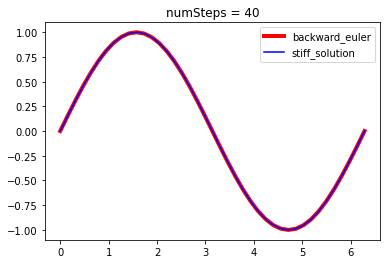

In [9]:


import matplotlib.pyplot as plt
import numpy as np

from forward_euler import forward_euler
from back_euler_lam import back_euler_lam
from stiff_ode import stiff_ode, stiff_solution, stiff_lambda 




#plt.plot(x_sol,y_sol,"b", label="stiff_solution")


LAMBDA = 10000

stiff_lambda(LAMBDA)

n = 40
x_sol = np.linspace(0, 2*np.pi, n)
y_sol = stiff_solution(x_sol)

#x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 
#f_ode = stiff_ode


yInitial = 0.0
xRange = [0, 2 * np.pi]
numSteps = 40

x,y = back_euler_lam ( LAMBDA, xRange , yInitial , numSteps )




plt.plot(x,y, "r", linewidth = 4,label="backward_euler")
plt.plot(x_sol,y_sol,"b", label="stiff_solution")

plt.title("numSteps = %d" %numSteps)
plt.legend()
plt.savefig("Exercise4.pdf")
plt.show()



In [10]:


import matplotlib.pyplot as plt
import numpy as np

from forward_euler import forward_euler
from back_euler_lam import back_euler_lam
from stiff_ode import stiff_ode, stiff_solution, stiff_lambda 

LAMBDA = 55
stiff_lambda(LAMBDA)

yexact = stiff_solution ( 2.0 * np.pi ) #typo in doc
numSteps = np.array ( [ 40, 80, 160, 320, 640, 1280, 2560] )

f_ode = stiff_ode
yInitial = 0.0
xRange = [0, 2 * np.pi]

#x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 

# error
e = np.zeros(len(numSteps))
r = np.zeros(len(numSteps) - 1)
for k in range(0, len(numSteps)):
    x, y = forward_euler ( f_ode, xRange, yInitial, numSteps[k] ) 
    e[k] = y[numSteps[k]] - yexact
    #plt.plot(x,y)
    #plt.title('n=%d' %numSteps[k])
    #plt.show()
    
for i in range(0, len(r)):
    r[i] = e[i]/e[i+1] 
print("r =", r)

r = [ 4.30329527e-07  2.41984077e+31 -6.88207997e+13  1.80245118e+00
  1.90590783e+00  1.95404366e+00]


In [11]:


import matplotlib.pyplot as plt
import numpy as np

from forward_euler import forward_euler
from back_euler_lam import back_euler_lam
from stiff_ode import stiff_ode, stiff_solution, stiff_lambda 

LAMBDA = 55
stiff_lambda(LAMBDA)

yexact = stiff_solution ( 2.0 * np.pi ) #typo in doc
numSteps = np.array ( [ 40, 80, 160, 320, 640, 1280, 2560] )

f_ode = stiff_ode
yInitial = 0.0
xRange = [0, 2 * np.pi]

#x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 
#x, y = back_euler_lam ( LAMBDA, xRange , yInitial , numSteps )
# error
e = np.zeros(len(numSteps))
r = np.zeros(len(numSteps) - 1)
for k in range(0, len(numSteps)):
    x, y = back_euler_lam ( LAMBDA, xRange , yInitial , numSteps[k] )
    e[k] = y[numSteps[k]] - yexact
    #plt.plot(x,y)
    #plt.title('n=%d' %numSteps[k])
    #plt.show()
    
for i in range(0, len(r)):
    r[i] = e[i]/e[i+1] 
print("r =", r)


r = [2.82999569 2.52685602 2.30409186 2.16471716 2.08593409 2.04391992]


In [12]:
#from scipy.optimize import fsolve 
#x = fsolve ( f , x0 )
#bef = y[k] - y[k-1] - ( x[k] - x[k-1] ) * f ( x[k], y[k] )
#y[k,:] = fsolve ( bef, y[k,:], args = ( f ode, x[k-1], y[k-1,:], x[k] ) )

In [13]:

#
#

def bef(yp, f, to, yo, tp):
    value = yp - yo - (tp-to) * f(tp, yp)
    return value



def back_euler ( f_ode, xRange, yInitial, numSteps ):
    """
      x, y = back_euler ( f_ode, xRange, yInitial, numSteps ) 

    uses Euler's backward implicit method on a system of ODEs dy/dx=f_ode(x,y).

  Input:
    f_ode evaluates the right hand side.
    xRange = [x1,x2], the solution interval.
    yInitial = k initial values for y at x1
    numSteps = number of equally-sized steps to take from x1 to x2
  Output:
    x = numSteps+1 x values.
    y = numSteps+1 rows and k columns, with k-th row containing solution at x[k]
  """
    import numpy as np
    from scipy.optimize import fsolve

    x = np.zeros ( numSteps + 1 )
    y = np.zeros ( ( numSteps + 1, np.size ( yInitial ) ) )

    dx = ( xRange[1] - xRange[0] ) / numSteps

    for k in range ( 0, numSteps + 1 ):

        if ( k == 0 ):
            x[0] = xRange[0]
            y[0,:] = yInitial
        else:
            x[k] = x[k-1] + dx
            y[k,:] = fsolve ( bef, y[k,:], args=(f_ode, x[k-1], y[k-1,:], x[k]) )

    return x, y



In [1]:
def trape ( f_ode, xRange, yInitial, numSteps, j ):
    """
      x, y = back_euler ( f_ode, xRange, yInitial, numSteps ) 

    uses Euler's backward implicit method on a system of ODEs dy/dx=f_ode(x,y).

  Input:
    f_ode evaluates the right hand side.
    xRange = [x1,x2], the solution interval.
    yInitial = k initial values for y at x1
    numSteps = number of equally-sized steps to take from x1 to x2
  Output:
    x = numSteps+1 x values.
    y = numSteps+1 rows and k columns, with k-th row containing solution at x[k]
  """
    import numpy as np
    from scipy.optimize import fsolve

    x = np.zeros ( numSteps + 1 )
    y = np.zeros ( ( numSteps + 1, np.size ( yInitial ) ) )

    dx = ( xRange[1] - xRange[0] ) / numSteps

    for k in range ( 0, numSteps + 1 ):

        if ( k == 0 ):
            x[0] = xRange[0]
            y[0,:] = yInitial
        elif (k == 1):
            x[1] = x[0] + dx
            y[1,:] = y[0,:] + dx * f_ode(x[0], y[0,:])
        else:
            x[k] = x[k-1] + dx
            y_init = y[k-2,:] + 2 * dx * f_ode(x[k], y[k-1,:])
            yn = y[k-1,:]
            xn = x[k-1]
            y[k,:] = midpoint_guess(f_ode, y_init, yn, xn, dx, j)
            #y[k,:] = (y[k-1,:] + dx * LAMBDA * np.sin(x[k])) / (1 + dx * LAMBDA)
            #y[k,:] = fsolve ( bef, y[k,:], args=(f_ode, x[k-1], y[k-1,:], x[k]) )

    return x, y

def midpoint_guess(f_ode, y_init, yn, xn, dx, j):
    """
    y^(j+1) = yn + h/2 * (f(xn, yn) + f(xn+1, yn+1))"""

    y = y_init
    for i in range(0,j):
        y = yn + dx/2. * (f_ode(xn, yn) + f_ode(xn+dx, y))
    return y

import numpy as np
import matplotlib.pyplot as plt

j = 1
#numSteps = np.array ( [ 40, 80, 160, 320, 640, 1280, 2560] )


numSteps = 40
f_ode = stiff_ode
yInitial = 0.0
xRange = [0, 2 * np.pi]

x, y = trape ( f_ode, xRange, yInitial, numSteps, j )
plt.plot(x,y)

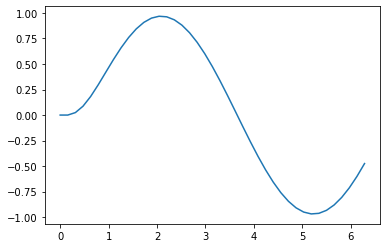

In [7]:
import numpy as np
import matplotlib.pyplot as plt

j = 1
#numSteps = np.array ( [ 40, 80, 160, 320, 640, 1280, 2560] )


numSteps = 40
f_ode = stiff_ode
yInitial = 0.0
xRange = [0, 2 * np.pi]

x, y = trape ( f_ode, xRange, yInitial, numSteps, j )
plt.plot(x,y)

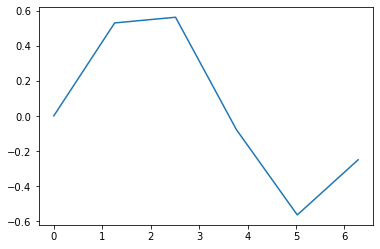

In [14]:
# test back_euler


LAMBDA = 1
stiff_lambda(LAMBDA)

f_ode = stiff_ode
yInitial = 0.0
xRange = [0, 2 * np.pi]
numSteps = 5
x, y = back_euler ( f_ode, xRange, yInitial, numSteps ) 

plt.plot(x,y)

In [15]:


import matplotlib.pyplot as plt
import numpy as np

from forward_euler import forward_euler
from back_euler_lam import back_euler_lam
from stiff_ode import stiff_ode, stiff_solution, stiff_lambda
from back_euler import back_euler

LAMBDA = 10000
stiff_lambda(LAMBDA)

yInitial = 0.0
xRange = [0, 2 * np.pi]
numSteps = 40

f_ode = stiff_ode

# back_euler_lam
x1, y1 = back_euler_lam ( LAMBDA, xRange , yInitial , numSteps )
#e[k] = y[numSteps[k]] - yexact
#plt.plot(x1,y1)
#plt.show()
x2, y2 = back_euler ( f_ode, xRange, yInitial, numSteps ) 

for k in range(0, numSteps):
    print(x1[k], y1[k], y2[k])



0.0 [0.] [0.]
0.15707963267948966 [0.15633494] [0.15633494]
0.3141592653589793 [0.30891986] [0.30891986]
0.47123889803846897 [0.4538982] [0.4538982]
0.6283185307179586 [0.58770007] [0.58770007]
0.7853981633974483 [0.70703081] [0.70703081]
0.9424777960769379 [0.80895211] [0.80895211]
1.0995574287564276 [0.89095432] [0.89095432]
1.2566370614359172 [0.95101828] [0.95101828]
1.413716694115407 [0.98766501] [0.98766501]
1.5707963267948966 [0.99999215] [0.99999215]
1.7278759594743862 [0.98769617] [0.98769617]
1.8849555921538759 [0.95107983] [0.95107983]
2.0420352248333655 [0.89104474] [0.89104474]
2.199114857512855 [0.80906918] [0.80906918]
2.356194490192345 [0.70717165] [0.70717165]
2.5132741228718345 [0.58786121] [0.58786121]
2.670353755551324 [0.45407567] [0.45407567]
2.827433388230814 [0.30910928] [0.30910928]
2.9845130209103035 [0.1565316] [0.1565316]
3.141592653589793 [9.95877114e-05] [9.95877114e-05]
3.2986722862692828 [-0.15633488] [-0.15633488]
3.4557519189487724 [-0.30891986] [-0.30

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [16]:
#%%writefile vanderpol_ode.py




def vanderpol_ode ( x, y ):
    import numpy as np
    NU = vanderpol_nu ( ) 
    fValue = np.zeros ( 2 )
    fValue[0] = y[1]
    fValue[1] = -NU * (y[0] ** 2 - 1) * y[1] - y[0] + np.exp(-x)
    return fValue

def vanderpol_nu ( nu_input = None ) :
    if ( not hasattr ( vanderpol_nu , "nu_default" ) ) : 
        vanderpol_nu.nu_default = 11.0
    if ( nu_input is not None ):
        vanderpol_nu.nu_default = nu_input
        
    nu_output = vanderpol_nu.nu_default
    return nu_output




In [17]:
from vanderpol_ode import vanderpol_ode , vanderpol_nu
NU = 11.0 # Choose a value for NU
vanderpol_nu(NU)

11.0

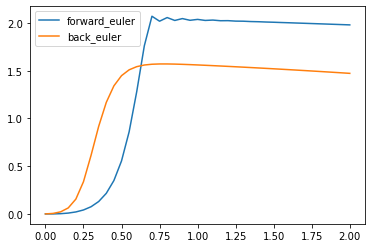

In [18]:

#%%writefile exercise8.py

import matplotlib.pyplot as plt
import numpy as np

from forward_euler import forward_euler
from stiff_ode import stiff_ode, stiff_solution, stiff_lambda 
from vanderpol_ode import vanderpol_ode , vanderpol_nu

NU = 100
vanderpol_nu(NU)


#x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 
yInitial = [0.0, 0]
xRange = [0, 2]
numSteps = 40

f_ode = vanderpol_ode

x1, y1 = forward_euler ( f_ode, xRange, yInitial, numSteps ) 


x2, y2 = back_euler ( f_ode, xRange, yInitial, numSteps ) 

plt.plot(x1,y1[:,0], label = "forward_euler")
plt.plot(x2,y2[:,0], label = "back_euler")
plt.legend()
plt.savefig("exercise8.pdf")
plt.show()

In [25]:
# %%writefile midpoint.py
#
#





def midpoint ( f_ode, xRange, yInitial, numSteps ):
    """
      x, y = midpoint ( f_ode, xRange, yInitial, numSteps ) 

    uses Euler's backward implicit method on a system of ODEs dy/dx=f_ode(x,y).

  Input:
    f_ode evaluates the right hand side.
    xRange = [x1,x2], the solution interval.
    yInitial = k initial values for y at x1
    numSteps = number of equally-sized steps to take from x1 to x2
  Output:
    x = numSteps+1 x values.
    y = numSteps+1 rows and k columns, with k-th row containing solution at x[k]
  """
    import numpy as np
    from scipy.optimize import fsolve

    x = np.zeros ( numSteps + 1 )
    y = np.zeros ( ( numSteps + 1, np.size ( yInitial ) ) )
    
    dx = ( xRange[1] - xRange[0] ) / numSteps
    
        
    for k in range ( 0, numSteps + 1 ):

        if ( k == 0 ):
            x[0] = xRange[0]
            y[0,:] = yInitial
        else:
            xm = x[k-1] + dx/2
            ym = y[k-1,:] + dx/2 * f_ode(x[k-1], y[k-1,:])
            
            x[k] = x[k-1] + dx
            y[k,:] = 2*fsolve ( bef, ym, args=(f_ode, x[k-1], y[k-1], xm) )-y[k-1,:]

    return x, y

def bef(yp, f, to, yo, tp):
    value = yp - yo - (tp-to)  * f(tp, yp)
    return value

In [30]:
#%%writefile exercise9.py
import matplotlib.pyplot as plt
import numpy as np

from forward_euler import forward_euler
from stiff_ode import stiff_ode, stiff_solution, stiff_lambda 
from vanderpol_ode import vanderpol_ode , vanderpol_nu
from midpoint import midpoint

NU = 11
vanderpol_nu(NU)


#x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 
yInitial = [0.0, 0]
xRange = [0, 2]
numSteps = 40

f_ode = vanderpol_ode

x1, y1 = midpoint ( f_ode, xRange, yInitial, numSteps ) 


#x2, y2 = back_euler ( f_ode, xRange, yInitial, numSteps ) 

plt.plot(x1,y1[:,0], label = "midpoint")
#plt.plot(x2,y2[:,0], label = "back_euler")
plt.legend()
plt.savefig("exercise9.pdf")
plt.show()

Overwriting exercise9.py


In [35]:
#%%writefile exercise10.py

import matplotlib.pyplot as plt
import numpy as np

from forward_euler import forward_euler
from back_euler_lam import back_euler_lam
from stiff_ode import stiff_ode, stiff_solution, stiff_lambda 
from vanderpol_ode import vanderpol_ode , vanderpol_nu
from midpoint import midpoint

LAMBDA = 55
stiff_lambda(LAMBDA)

yexact = stiff_solution ( 2.0 * np.pi ) #typo in doc
numSteps = np.array ( [ 40, 80, 160, 320, 640, 1280, 2560] )

f_ode = stiff_ode
yInitial = 0.0
xRange = [0, 2 * np.pi]

#x, y = forward_euler ( f_ode, xRange, yInitial, numSteps ) 

# error
e = np.zeros(len(numSteps))
r = np.zeros(len(numSteps) - 1)

for k in range(0, len(numSteps)):
    x, y = midpoint ( f_ode, xRange, yInitial, numSteps[k] ) 
    e[k] = y[numSteps[k]] - yexact
    #plt.plot(x,y)
    #plt.title('n=%d' %numSteps[k])
    #plt.show()
    
for i in range(0, len(r)):
    r[i] = e[i]/e[i+1] 
print("r =", r)


r = [4.01131599 4.00282342 4.00070548 4.00017547 4.00003785 3.99998221]


/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
